In [1]:
import json
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import mlflow

In [2]:
work_dir = Path.home() / 'Programming/Python/machine-learning-exercises/higher-education-students-performance-evaluation'
data_file = work_dir / 'data/students-performance.csv'
attribute_names_json_file = work_dir / 'attribute_names.json'
path_dir = work_dir / 'plots'
path_dir.mkdir(parents=True, exist_ok=True)
plot_file = path_dir / 'attribute_bar_plots.png'

In [3]:
sp_df = pd.read_csv(data_file)

In [4]:
mlflow.set_tracking_uri('sqlite:///mlflow.db')
mlflow.set_experiment('higher-education-students-performance-evaluation')

<Experiment: artifact_location='/Users/angelo/Programming/Python/machine-learning-exercises/higher-education-students-performance-evaluation/mlruns/1', creation_time=1751896100498, experiment_id='1', last_update_time=1751896100498, lifecycle_stage='active', name='higher-education-students-performance-evaluation', tags={}>

In [5]:
with open(attribute_names_json_file, 'rt') as f_in:
    attribute_names_json = json.load(f_in)

In [6]:
column_names = list(sp_df.columns[1:-2])
column_counts = []
for col in column_names:
    column_counts.append(sp_df.groupby(col, observed=False).size())

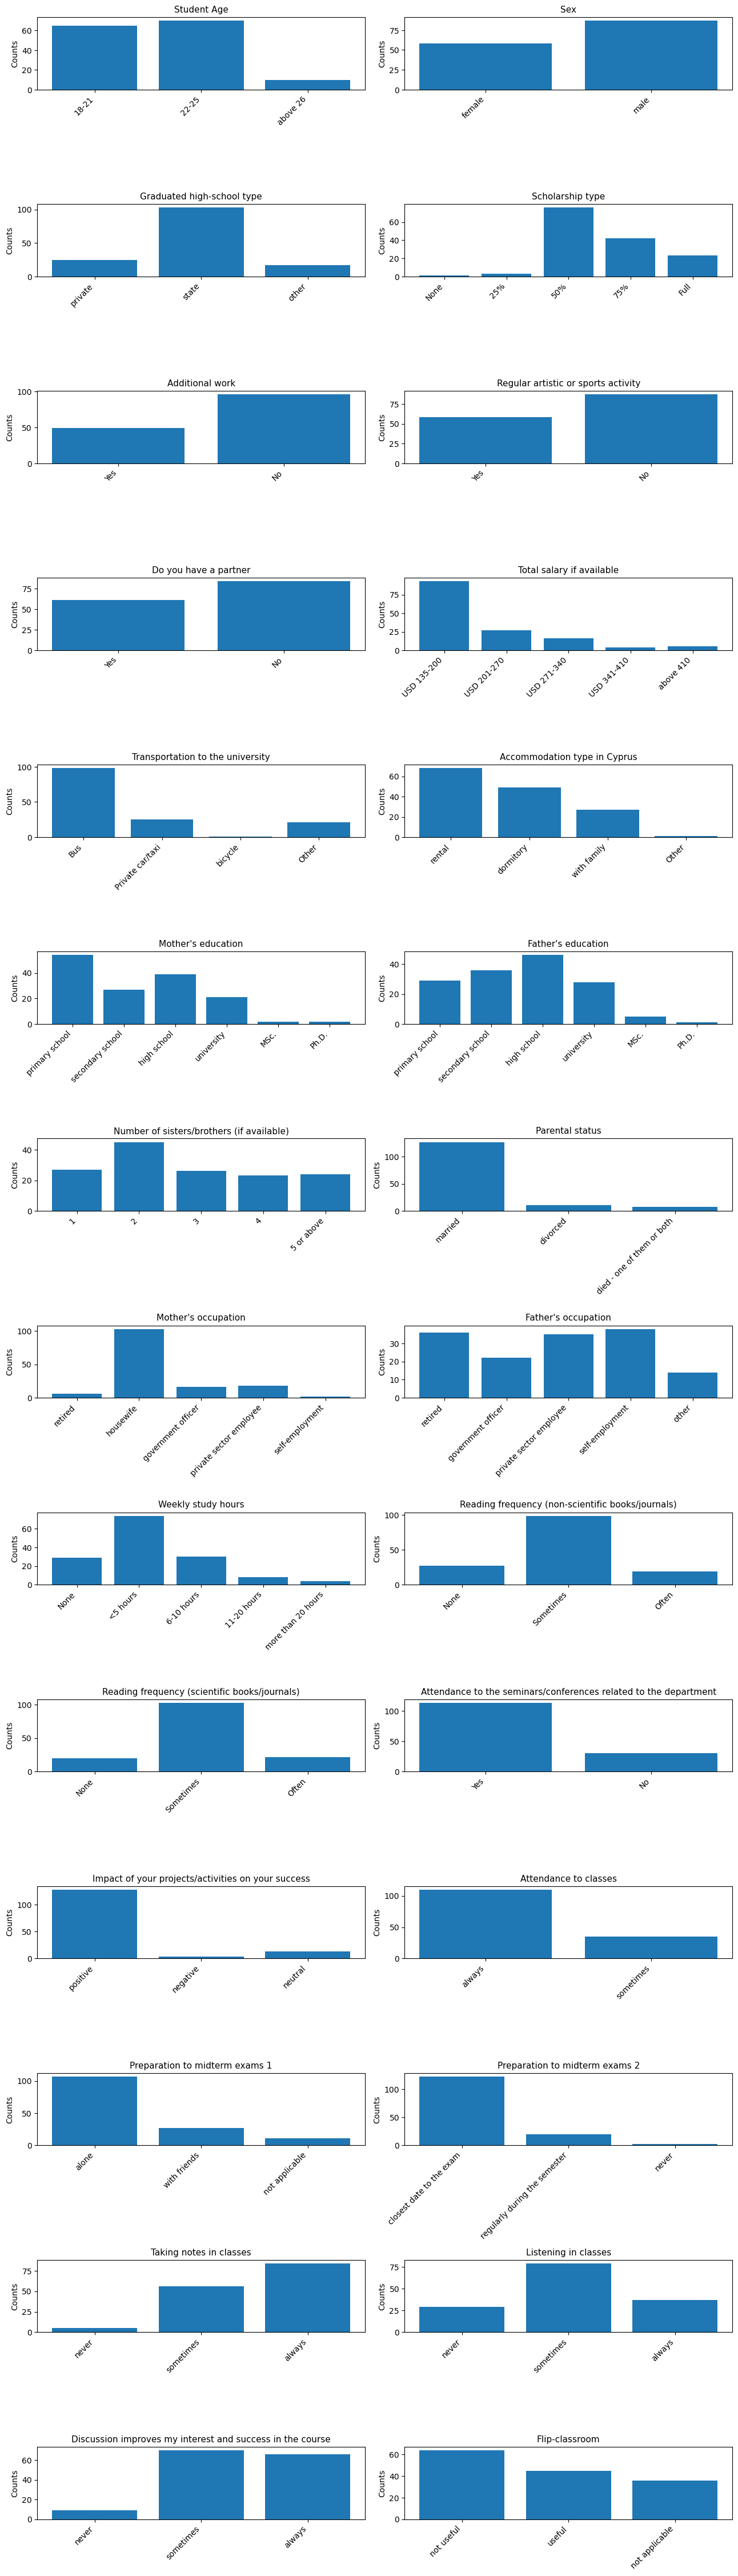

In [7]:
fig, axs = plt.subplots(nrows=14, ncols=2, figsize=(13, 45))
for ax, col_count, col_name in zip(axs.flatten(), column_counts, column_names):
    if col_name in ['15', '22', '30']:
        ax.bar(list(attribute_names_json[col_name]['options'].values())[:-1], col_count.values)
    else:
        ax.bar(list(attribute_names_json[col_name]['options'].values()), col_count.values)
    ax.set_ylabel('Counts', fontsize=10)
    ax.set_title(attribute_names_json[col_name]['name'], fontsize=11)
    ax.yaxis.set_tick_params(pad=3)
    plt.tight_layout(pad=1)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    plt.savefig(plot_file, dpi=144, bbox_inches='tight')